In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 6)

In [2]:
mobile_sales = pd.read_excel('mobilesales.xlsx')
mobile_sales.head()

,DATE,Sales
0,2001-01-01,6519.0
1,2001-02-01,6654.0
2,2001-03-01,7332.0
3,2001-04-01,7332.0
4,2001-05-01,8240.0


In [3]:
mobile_sales['DATE'].describe()

C:\Users\gaura\AppData\Local\Temp\ipykernel_10084\193277671.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  mobile_sales['DATE'].describe()


count                     217
unique                    217
top       2001-01-01 00:00:00
freq                        1
first     2001-01-01 00:00:00
last      2019-01-01 00:00:00
Name: DATE, dtype: object

In [4]:
mobile_sales.set_index('DATE',inplace=True)

<Axes: xlabel='DATE'>

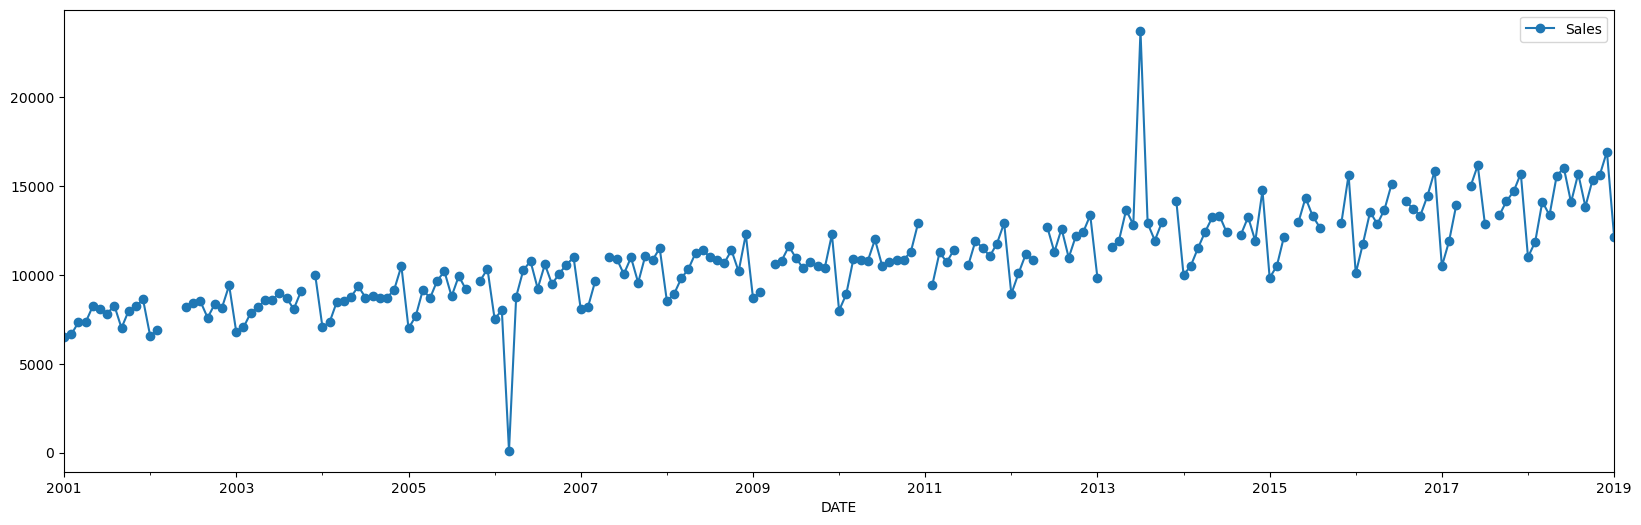

In [5]:
mobile_sales.plot(style='-o')

# Why we should not use mean for imputation?

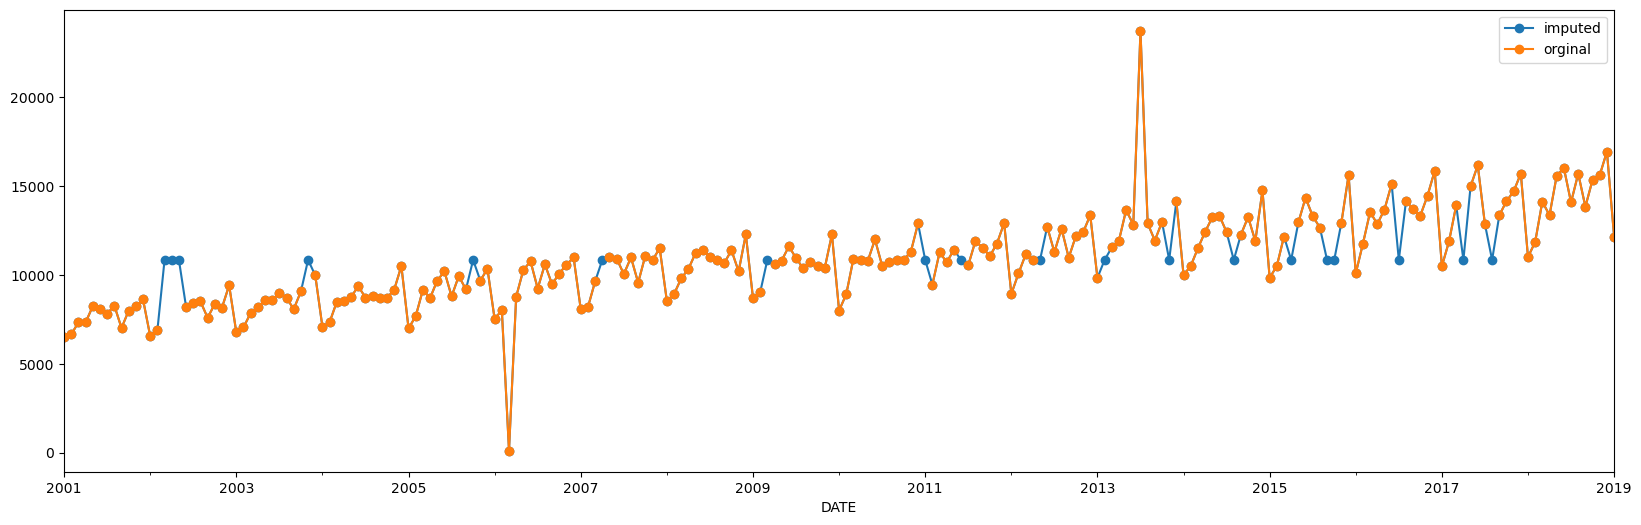

In [6]:
df_mean = mobile_sales['Sales'].mean()
mobile_sales.Sales.fillna(df_mean).plot(style='-o',label='imputed')
mobile_sales.Sales.plot(style='-o',label='orginal')
plt.legend()
plt.show()

# Using Interpolation

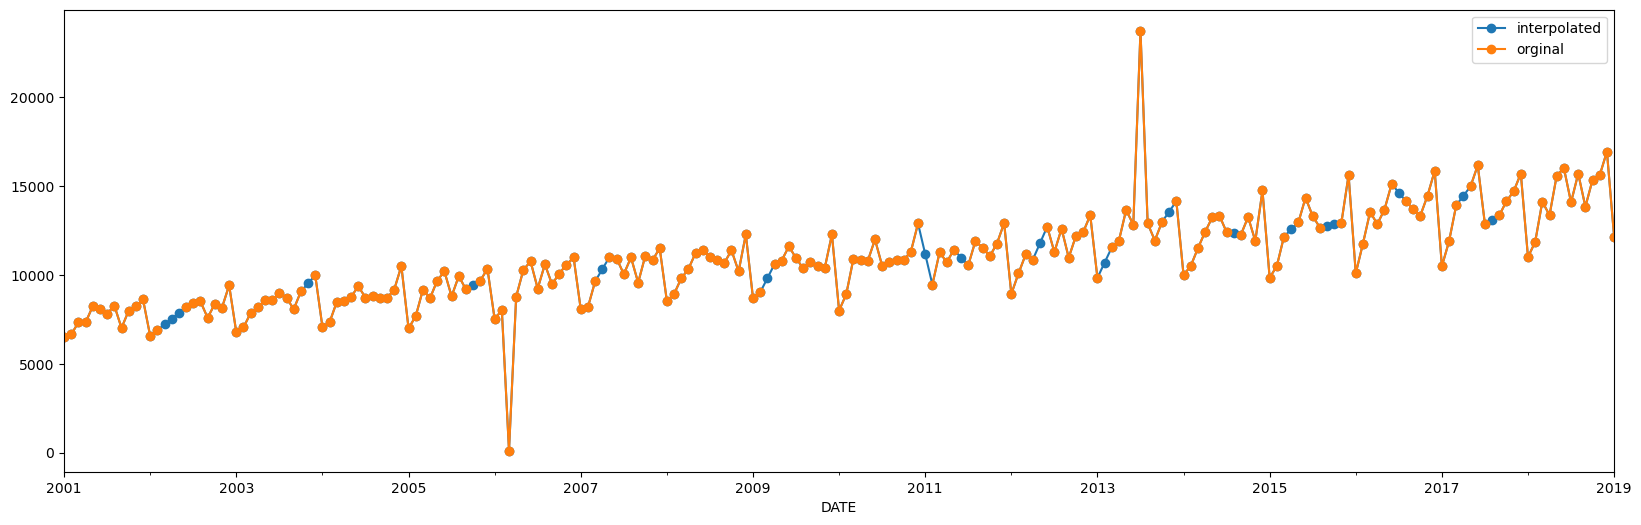

In [7]:
mobile_sales.Sales.interpolate(method='linear').plot(style='-o',label='interpolated')
mobile_sales.Sales.plot(style='-o',label='orginal')
plt.legend()
plt.show()

The Reason Why we should not use Means for imputation because it makes value for inflated which results in worsening the series.

In [8]:
mobile_sales.Sales = mobile_sales.Sales.clip(upper = mobile_sales.Sales.quantile(0.99),lower = mobile_sales.Sales.quantile(0.1))

<Axes: xlabel='DATE'>

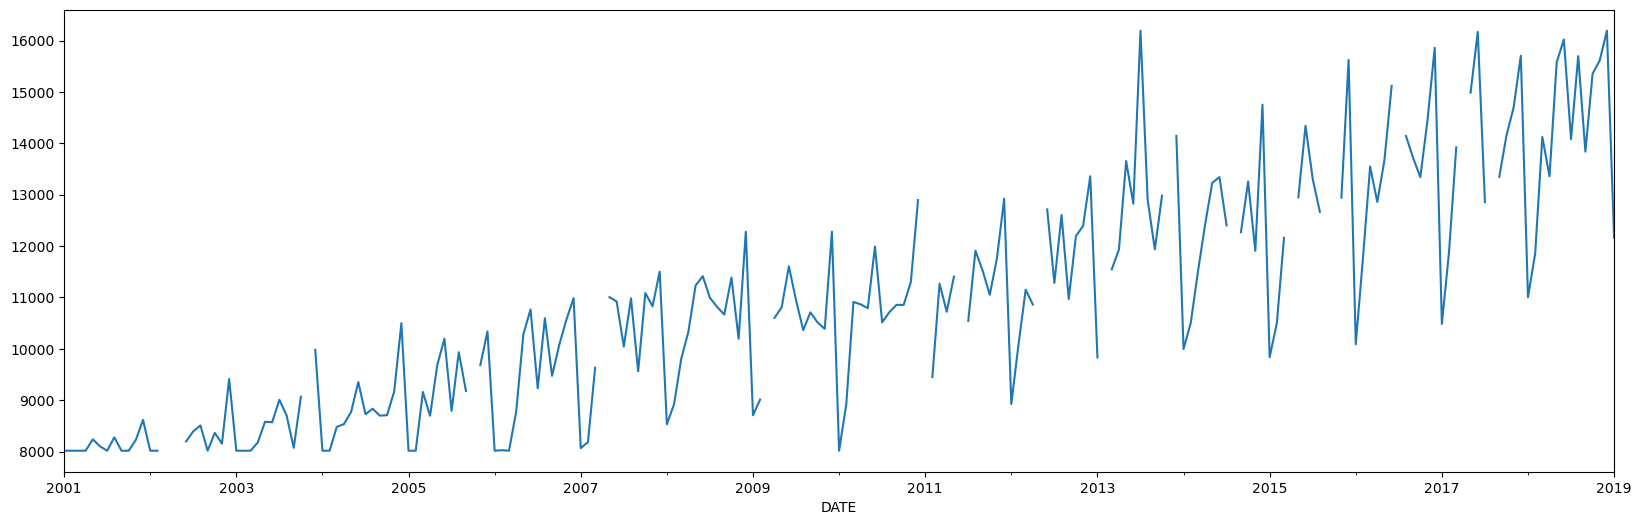

In [9]:
mobile_sales.Sales.plot()

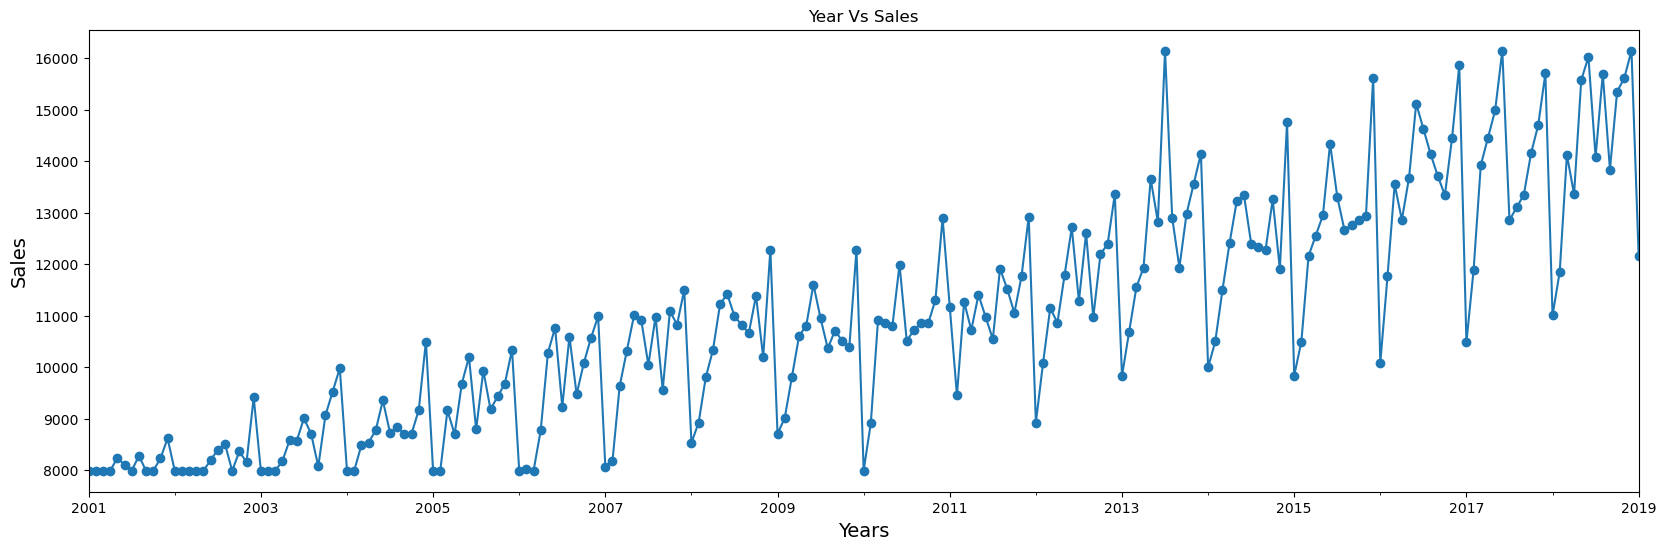

In [10]:
mobile_sales = pd.read_excel('mobilesales.xlsx')
mobile_sales.set_index('DATE',inplace=True)
mobile_sales.Sales = mobile_sales.Sales.interpolate()
mobile_sales.Sales = mobile_sales.Sales.clip(upper=mobile_sales.Sales.quantile(0.99),lower=mobile_sales.Sales.quantile(0.1))
mobile_sales.Sales.plot(style='-o')
plt.title('Year Vs Sales')
plt.xlabel('Years',fontsize=14)
plt.ylabel('Sales',fontsize=14)
plt.show()

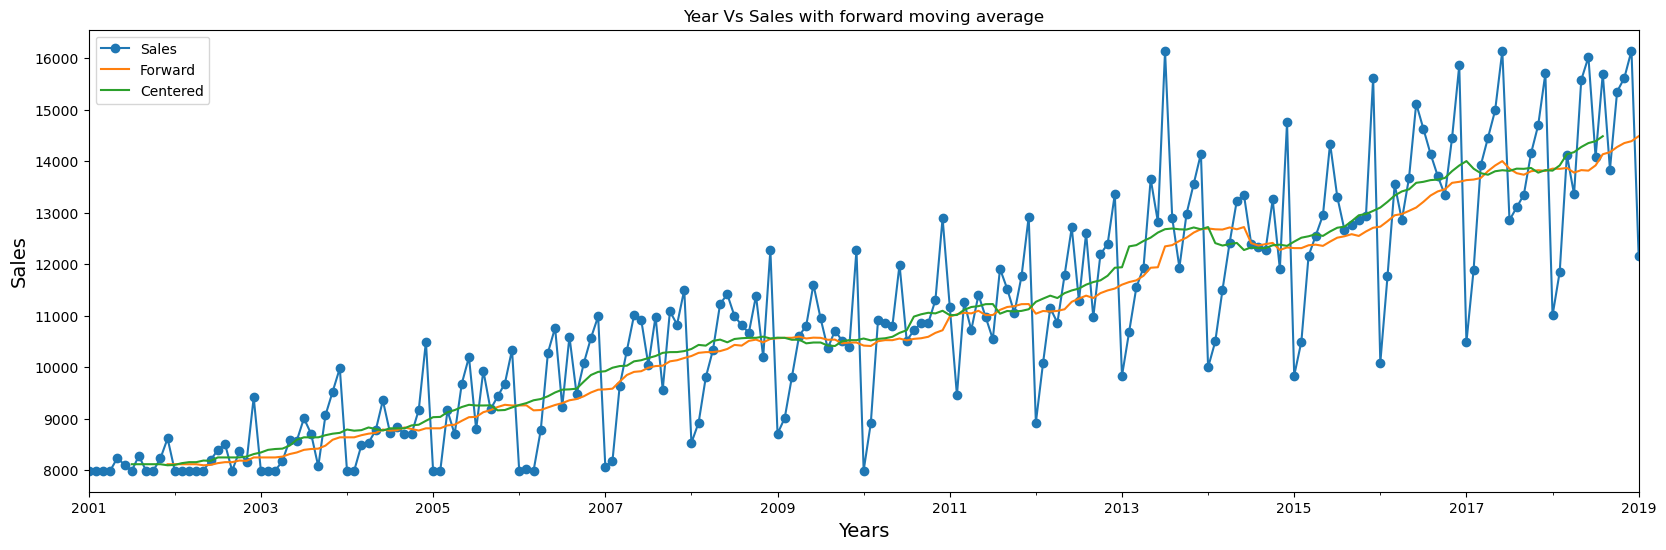

In [16]:
mobile_sales.Sales.plot(style='-o')
mobile_sales.Sales.rolling(12,center=False).mean().plot(label='Forward')
mobile_sales.Sales.rolling(12,center=True).mean().plot(label='Centered')
plt.title('Year Vs Sales with forward moving average')
plt.legend()
plt.xlabel('Years',fontsize=14)
plt.ylabel('Sales',fontsize=14)
plt.show()
# Number -> 12 is taken because it is taken like after how many interval data is going to rotate.

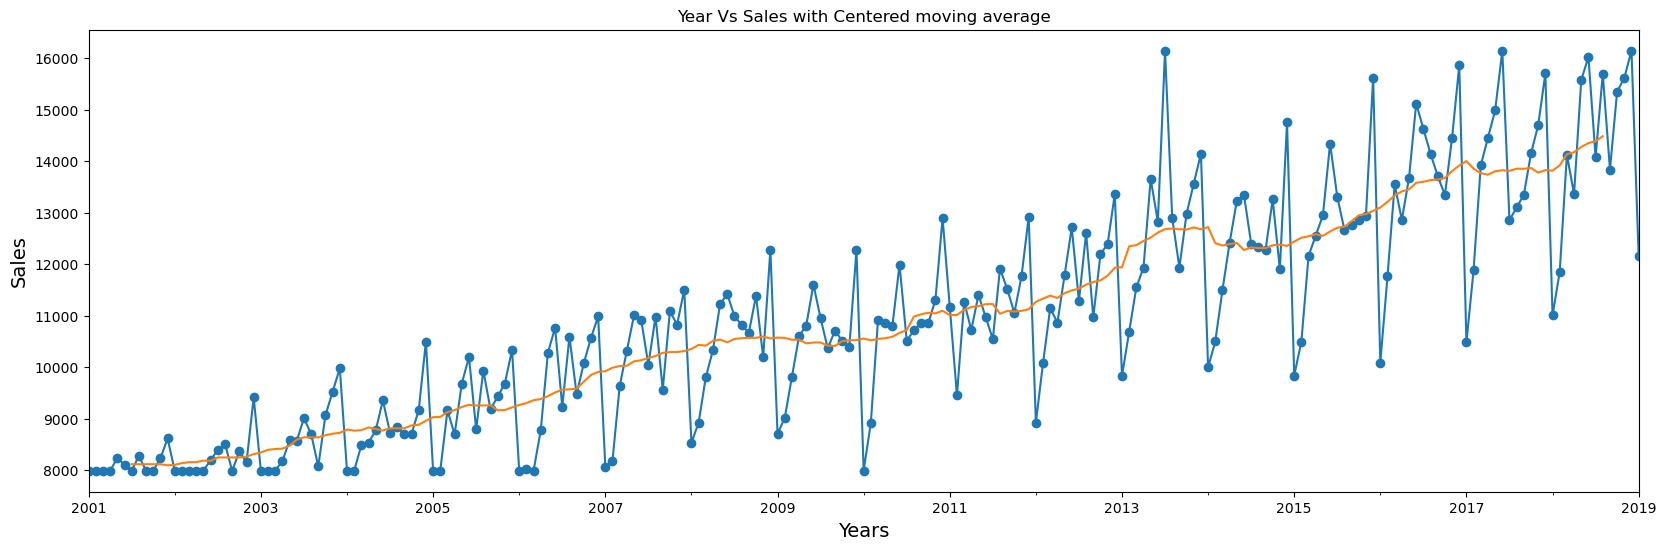

In [13]:
mobile_sales.Sales.plot(style='-o')
mobile_sales.Sales.rolling(12,center=True).mean().plot()
plt.title('Year Vs Sales with Centered moving average')
plt.xlabel('Years',fontsize=14)
plt.ylabel('Sales',fontsize=14)
plt.show()

In [17]:
import statsmodels.api as sm

In [18]:
model = sm.tsa.seasonal_decompose(mobile_sales.Sales,model='additive')

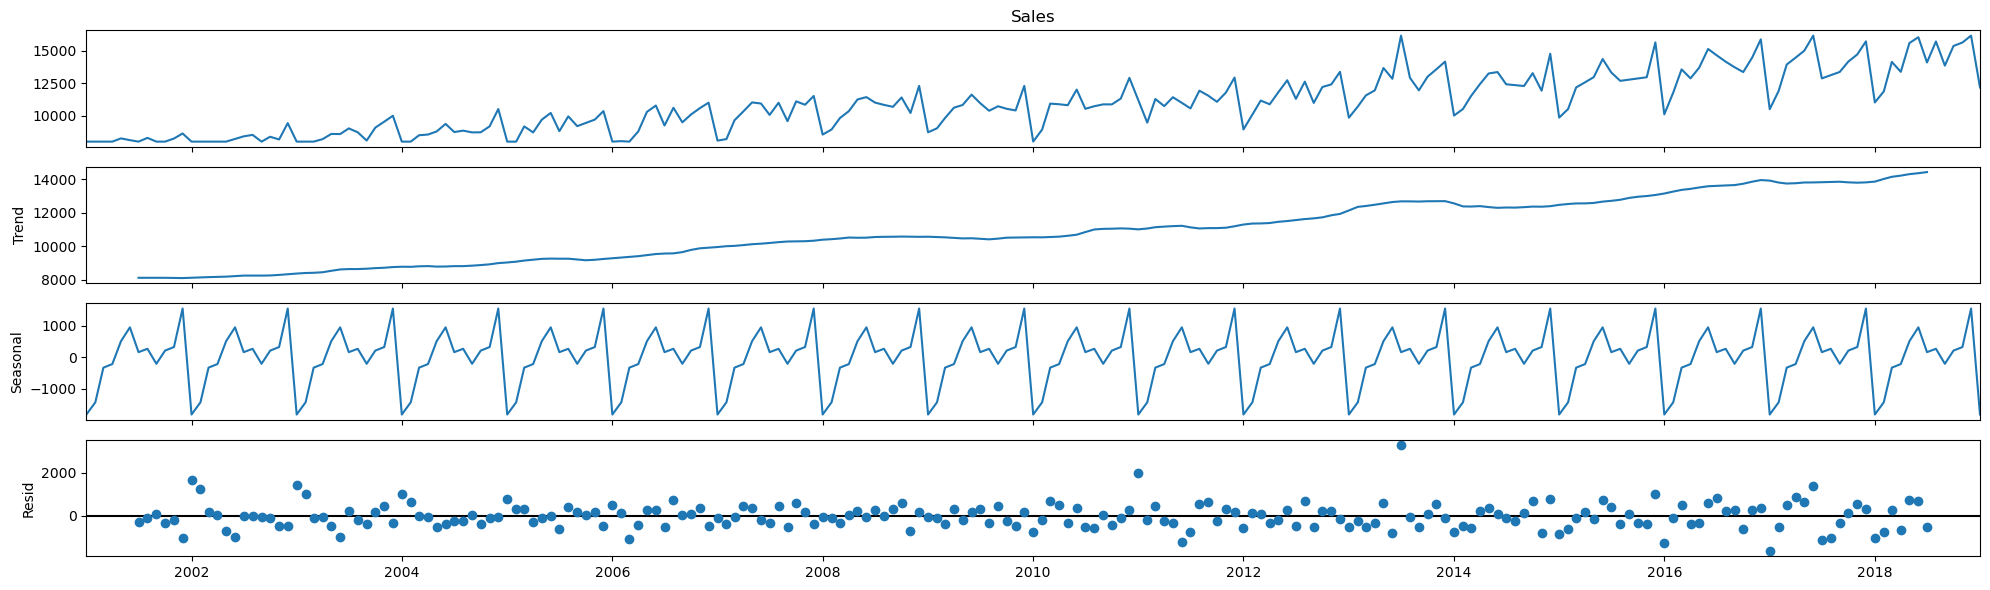

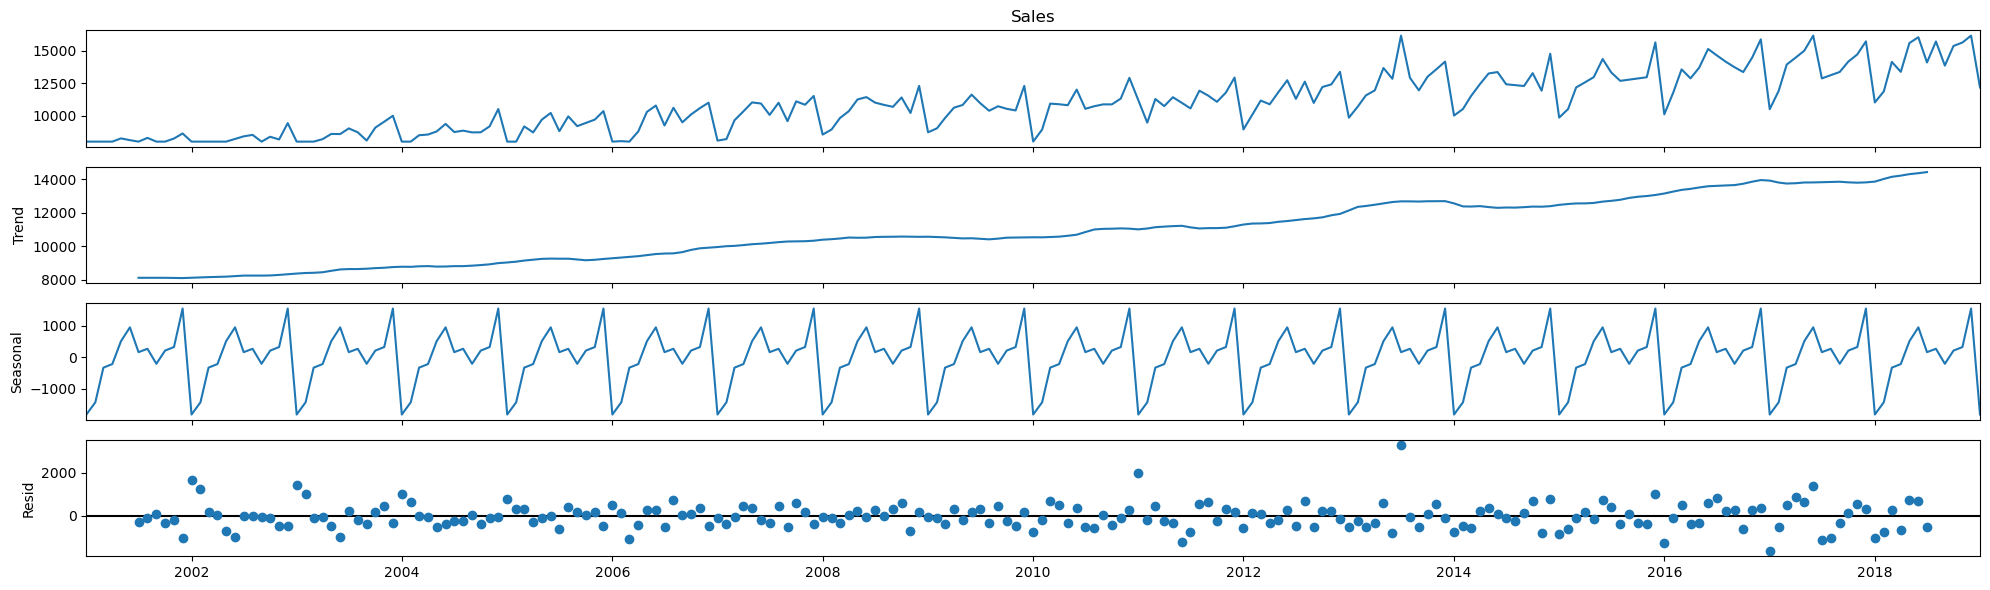

In [19]:
model.plot()

In [20]:
model1 = sm.tsa.seasonal_decompose(mobile_sales.Sales,model='multiplicative')

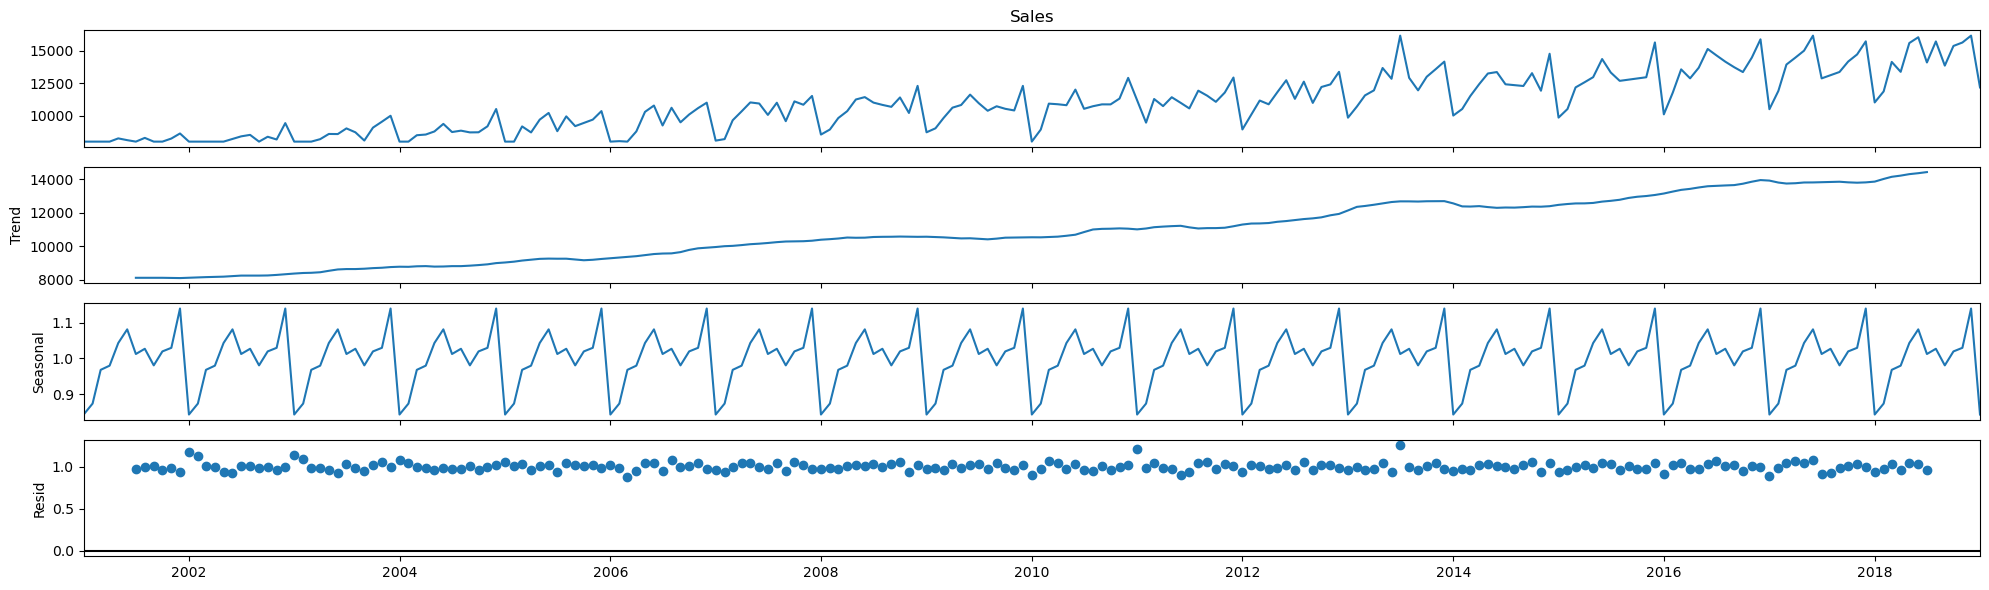

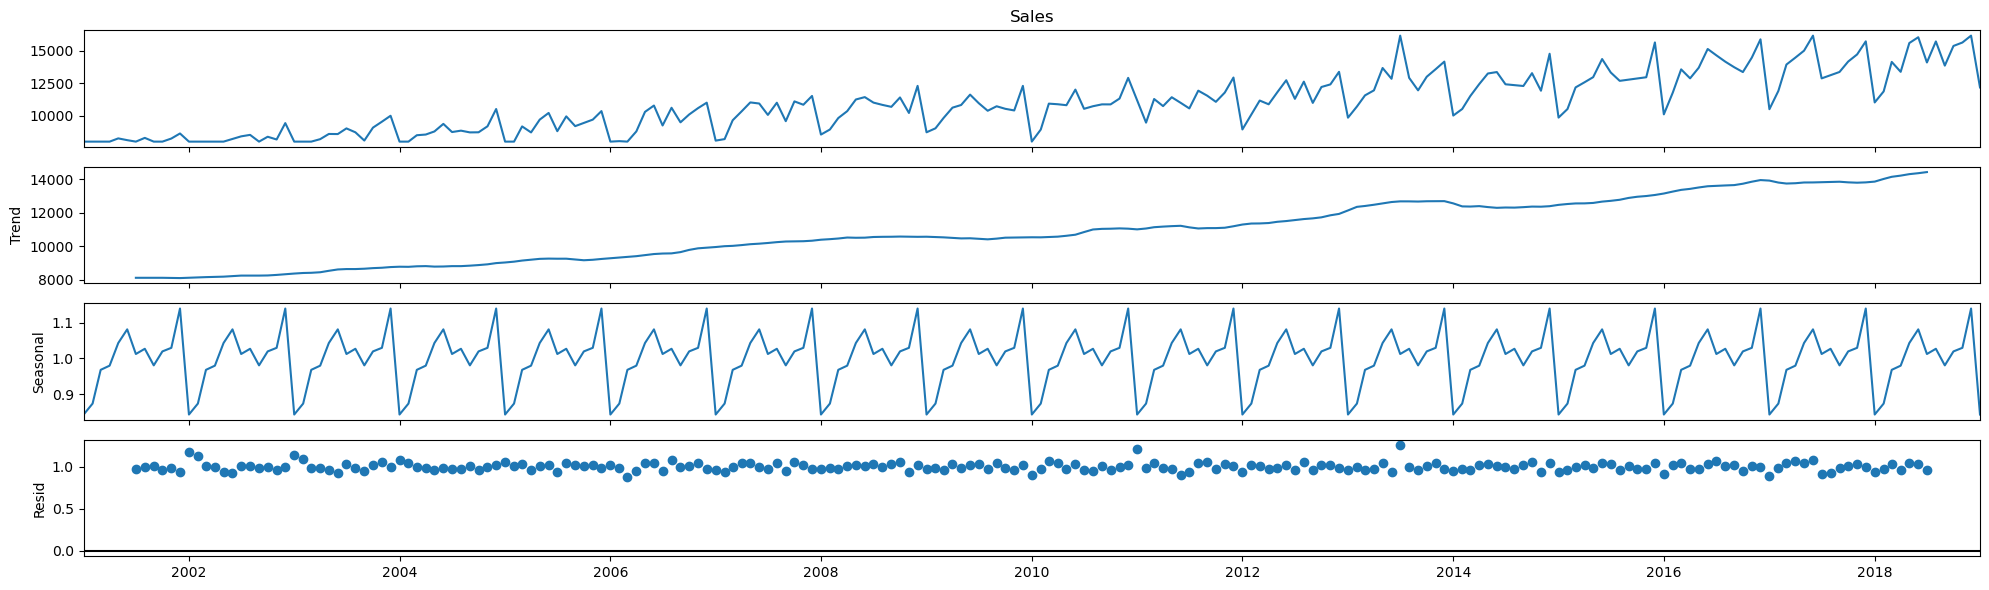

In [21]:
model1.plot()